<a href="https://colab.research.google.com/github/SudeepSarkar/Computer-Vision-Course/blob/main/Lecture_5_Linear_Filtering_and_Edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(c) 2021 Sudeep Sarkar, University of South Florida, Tampa

# Convolution of Images

**Reading**: Section 3.2, correlation, convolution, Gaussian smoothing, 2D filtering using 1D filters.

Linear filtering is an essential operation done on the image for various purposes, reduces noise, sharpens features, and emphasizes certain kinds of features such as edges and corners. 

See Fig 3.11 for examples.

Most common version is the weighted sum of neighboring pixels. This is called a **correlation**, given by: 

\begin{eqnarray}
g(i,j) = f \otimes h & = & \sum_{k=1}^N \sum_{l=1}^N h(k, l) f(i+k, j+l) \\ 
         h \otimes f & = & \sum_{k,l} f(k, l) h(i+k, j+l) 
\end{eqnarray}


The function $h(i,j)$ is called a filter or mask, or kernel. Place the filter at a location, multiple, and then add to get the value. Note that the operation is *commutative*. So, equivalently shift the image, keeping the filter fixed, and then multiply and add. You have to be careful about coding appropriately for the array indices of the output array if you do so. 

**What happens at the boundaries?**

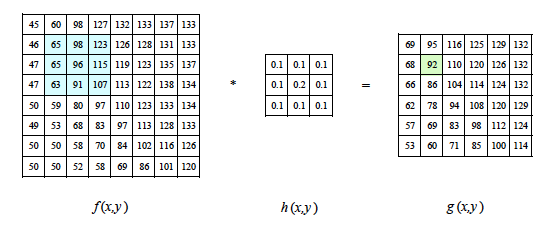

In [2]:
import numpy as np
h = np.array([[-1, 1],[-1, 1]])
f = np.zeros((10,10))
f[3:8,3:8] = np.ones((5, 5))

print("f=\n", f, "\nh=\n", h)

# So that we do not have to worry about indexing out of bounds
# We can also adjust how we want to fix the out of array bounds issue, which can
# be done my returning zero as in the following case or returning the boundary value
# which might be appropriate in certain conditions.
def my_array_ref (a, i, j):
    if ((i >= 0) & (i < a.shape [0]) & (j >= 0) & (j < a.shape [1])):
        return a[i, j]
    else :
        return 0

print(my_array_ref(f, -2, 3), my_array_ref(h, 0, 0))

g = np.zeros((10, 10))
for i in range(f.shape[0]) :
    for j in range (f.shape[1]):
        prod_sum = 0.0
        for k in range (h.shape[0]) :
            for l in range (h.shape[1]) :
                prod_sum = prod_sum + my_array_ref(h, k, l) * my_array_ref(f, i+k, j+l)
        g[i, j] = prod_sum

print("f=\n", g)


f=
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 
h=
 [[-1  1]
 [-1  1]]
0 -1
f=
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


# Lecture 5 - Homework or Inclass Assignment

1. Change the code so that instead of returning zero when index is out of bounds, it should return the boundary value, i.e. for f(-2, 3) and f (2, 15) it should return f(0, 3) and f(2, 10), respectively.

2. Compute $ h \otimes (1 - f)$ using this new my_array_ref and compare it with the previous convention.

3. Submit on Canvas.

# Convolution

The **convolution** flips the filter about the origin and then correlates with the image function. The "flip" is around the "origin" of the kernel. In the example above, *the origin was the (0,0) entry of the kernel matrix, but that need not be the case always*. Below are some examples of flipped kernels or masks.

For circularly symmetric kernels, flipping does not affect, so convolution is the same as a correlation.

Mathematically, the convolution operations is given by    

\begin{eqnarray}
f \star h & = & \sum_{k, l} h(k, l) f(i - k, j - l)  \\
h \star f & = & \sum_{k, l} f(k, l) h(i - k, j - l)
\end{eqnarray}

Convolution is an essential mathematical operation in signal processing, with many favorable properties, and plays a crucial role in modeling electrical circuit signals. If you are interested, you can look up an MIT such as [signal processing lecture](https://ocw.mit.edu/resources/res-6-007-signals-and-systems-spring-2011/video-lectures/lecture-4-convolution/) for a fuller treatment of this topic.



In [3]:
print("f=\n", f, "\nh=\n", h)


g = np.zeros((10, 10))
for i in range(f.shape[0]) :
    for j in range (f.shape[1]):
        prod_sum = 0.0
        for k in range (h.shape[0]) :
            for l in range (h.shape[1]) :
                prod_sum = prod_sum + my_array_ref(h, k, l) * my_array_ref(f, i-k, j-l)
        g[i, j] = prod_sum

print("f=\n", g)

f=
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 
h=
 [[-1  1]
 [-1  1]]
f=
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. -2.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0. -2.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0. -2.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0. -2.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


#Question? (Impulse Response)

Let $f(i,j)$ be a zero-valued function with only one non-zero entry at the center equal to 1, i.e., the input is a unit impulse. What is the convolution of this function with any mask, i.e., the impulse response? 

In [4]:
import scipy.ndimage as scimage
print("Using scipy convolve. Compare with previous. \n", scimage.convolve(f, h))

f = np.zeros([10,10])
f[5, 5] = 1
g = scimage.convolve(f, h, mode='reflect', cval=1.0, origin=(0,0))
print("Impulse reponse of convolution: f=\n", f, "\n f*h=\n", g)



Using scipy convolve. Compare with previous. 
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0. -2.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0. -2.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0. -2.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0. -2.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Impulse reponse of convolution: f=
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 
 f*h=
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 

# Properties of the convolution operations

1. **Convolution is a linear operation**: Convolution of the sum of two images is the sum of each of their convolution. Convolution of a scaled version of an image is the scaled version of the convolution of the image.

\begin{equation}
         h \star (a f_1 + f_2) = a (h \star f_1) + (h \star f_2)
\end{equation}

2. Convolution is a **shift-invariant operation** since the filter is the *same for each shift*.  So, convolution is a linear, shift-invariant (LSI) operation.
    
3. **Continuous version**

\begin{eqnarray}
        f \star h & = & \int_u \int_v f (u, v) h(x-u, y-v) du dv \\
        h \star f  & = & \int_u \int_v h(u, v) f (x-u, y-v) du dv 
\end{eqnarray}
    
4. **Derivative of a convolution** is the convolution with the derivative
\begin{eqnarray}
        \frac{\partial}{\partial x} f \star h & = & \int_u \int_v  f (u, v) \left ( \frac{\partial}{\partial x} h(x-u, y-v) \right ) 
         du dv \\
         & = & \int_u \int_v  f (u, v) h_x(x-u, y-v)  du dv 
\end{eqnarray}

# Filtering with Gaussian shaped filters. 
Consider just one dimensional filtering for now. Let the filter be
    
\begin{equation}
        h(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp - \frac{x^2}{2 \sigma^2}
\end{equation}
    
And let the "image" be a **step function** $u(x)$.
\begin{equation}
        s(x) = \left \{ \begin{array}{l r}
                    1 & x \ge 0 \\
                    0 & x < 0 
                \end{array} \right .
\end{equation}
    
The convolution $g(x) = s(x) \star h(x) $ will smooth the sharp edge.
\begin{eqnarray}
        s(x) \star h(x) &  = & \int_u s(u) h (x - u) du \\
        & = & \int_{u=0}^{\infty} h (x - u) du \\
        & = & \int_{v=-\infty}^{x} h (v) dv
\end{eqnarray}
    
The derivative of the output $\frac{d}{dx} g(x) $ is a Gaussian function. 

\begin{eqnarray}
        \frac{d}{dx} g(x)  &  = & \frac{d}{dx} \int_{v=-\infty}^{x} h (v) dv \\
               & = & h(x)
\end{eqnarray}

This is equivalent to convolution with a derivative of a Gaussian function. You can verify this, i.e. $s(x) \star h'(x) = h(x)$ by doing the convolution mathematically. Use integration by parts in the derivation.

\begin{eqnarray}
        h'(x) & = & \frac{d}{dx} \left (\frac{1}{\sqrt{2 \pi} \sigma} \exp - \frac{x^2}{2 \sigma^2} \right )\\
              & = &  - \frac{x}{\sqrt{2 \pi} \sigma^3} \exp - \frac{x^2}{2 \sigma^2}
\end{eqnarray}

We can use this operation, i.e., convolution with a Gaussian followed by a derivative or convolution with a derivative of a Gaussian function for "edge" detection. The point of maximum marks the edge. 

Using the first derivative of a Gaussian by marking the local maxima in response is the optimal method for detecting object boundaries based on intensity. The underlying assumption is intensity changes accompany object edges. However, note that not all intensity changes are due to object boundaries. (Can you think of some other causes for intensity changes in images?) ([Canny, 1986](https://ieeexplore.ieee.org/abstract/document/4767851)) showed that the first derivative of a Gaussian is the optimal filter shape that maximizes (i) strength of the response, (ii) increases the precision of edge localization, and (iii) suppresses noise to the most extent. Later, ([Sarkar and Boyer, 1991](https://ieeexplore.ieee.org/abstract/document/103275)) showed how this filter could efficiently be implemented using a recursive digital filter involving a fixed number of operations, irrespective of scale (sigma) and suitable for direct hardware implementation. There are, of course, many variations of this derivative idea for edge detection. Many edge detectors have been proposed in the literature. See ([Heath et al., 1997](https://ieeexplore.ieee.org/abstract/document/643893)) for an evaluation of edge detectors concerning their capacity to sustain object recognition by humans.


Text(0.5, 1.0, 'Convolution with first derivative of Gaussian with different sigmas.')

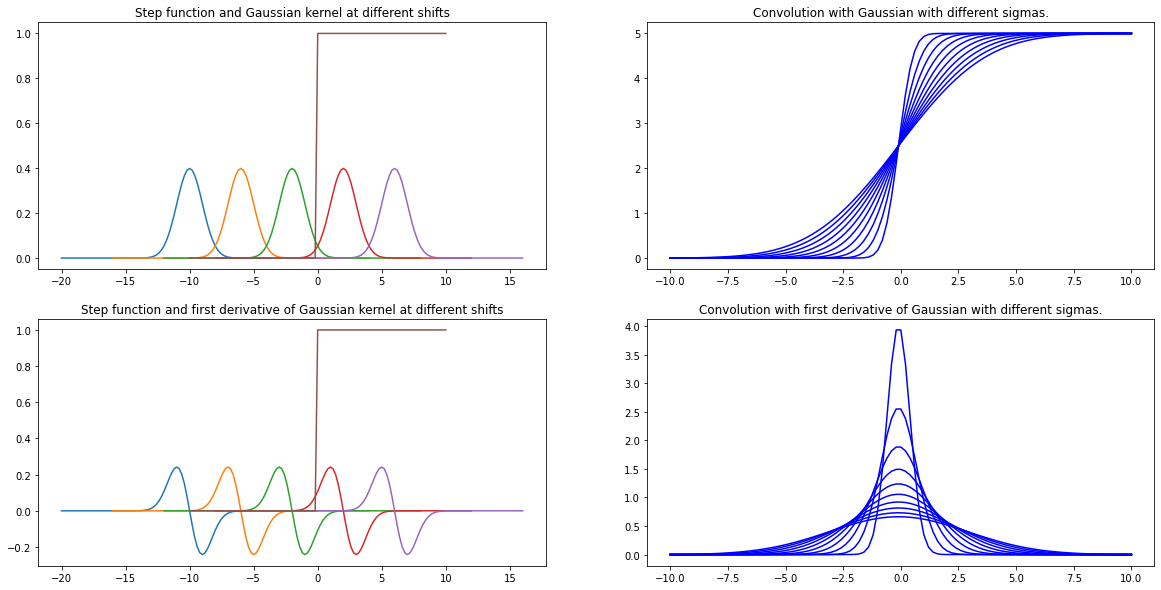

In [5]:
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 101)

def s(x) : # Step function
    return(np.ones(x.shape)*np.greater_equal(x, 0))

def gaussian (x, sigma):
    return (np.exp(-(x**2/(2*sigma*sigma)))*(1/(np.sqrt(2*np.pi)*sigma)))

def first_derivative_of_gaussian (x, sigma):
    return (np.exp(-(x**2/(2*sigma*sigma)))*(-x/(np.sqrt(2*np.pi)*sigma**3)))


plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
for i in range (-10, 10, 4) :
  plt.plot(t+i, gaussian(t, 1))
plt.plot(t, s(t))
plt.title('Step function and Gaussian kernel at different shifts')

plt.subplot(2, 2, 2)
for sigma in np.linspace(0.5, 3, 10):
    plt.plot(t, scimage.convolve(s(t), gaussian(t, sigma)), 'b')
plt.title('Convolution with Gaussian with different sigmas.')

plt.subplot(2,2,3)
for i in range (-10, 10, 4) :
  plt.plot(t+i, first_derivative_of_gaussian(t, 1))
plt.plot(t, s(t))
plt.title('Step function and first derivative of Gaussian kernel at different shifts')

plt.subplot(2, 2, 4)
for sigma in np.linspace(0.5, 3, 10):
    plt.plot(t, scimage.convolve(s(t), first_derivative_of_gaussian(t, sigma)), 'b')
plt.title('Convolution with first derivative of Gaussian with different sigmas.')



# Second derivative of a Gaussian

Taking another derivative produces a **zero-crossing ** at the edge location. The overall operation is equivalent to convolution with a second derivative of a Gaussian.

\begin{eqnarray}
        h''(x) & = &  \frac{d}{dx} \left ( - \frac{x}{\sqrt{2 \pi} \sigma^3} \exp - \frac{x^2}{2 \sigma^2} \right ) \\
        & = & - \frac{1}{\sqrt{2 \pi} \sigma^3} \exp - \frac{x^2}{2 \sigma^2} + \frac{x^2}{\sqrt{2 \pi} \sigma^5} \exp - \frac{x^2}{2 \sigma^2} \\
        & = & - \frac{1}{\sqrt{2 \pi} \sigma^3} 
        \left (1 - \frac{x^2}{\sigma^2} \right ) 
        \exp - \frac{x^2}{2 \sigma^2} 
\end{eqnarray}

Interestingly, the shape LoG is very similar to difference of two Gaussians (DoG) of different scales, $h_{\sigma_1}(x) - h_{\sigma_2}(x)$.


Text(0.5, 1.0, 'Convolution with Gaussian with different sigmas.')

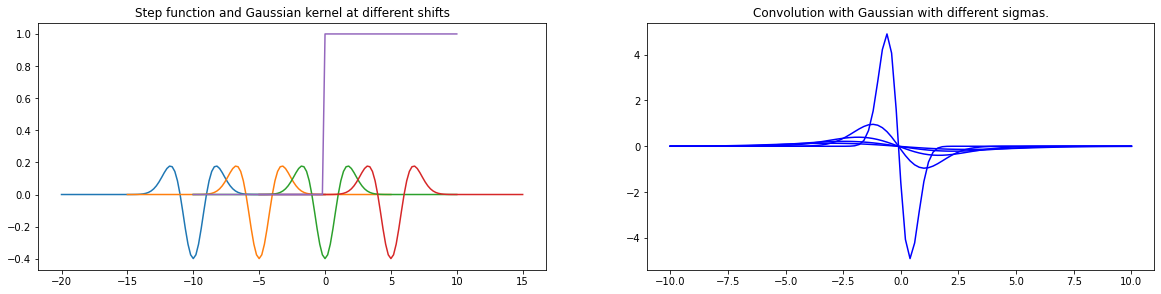

In [6]:
def second_derivative_of_gaussian (x, sigma):
    return (np.exp(-(x**2/(2*sigma*sigma)))*(-(1 - x*x/(sigma*sigma))/(np.sqrt(2*np.pi)*sigma**3)))


plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
for i in range (-10, 10, 5) :
  plt.plot(t+i, second_derivative_of_gaussian(t, 1))
plt.plot(t, s(t))
plt.title('Step function and Gaussian kernel at different shifts')

plt.subplot(2, 2, 2)
for sigma in np.linspace(0.5, 3, 5):
    plt.plot(t, scimage.convolve(s(t), second_derivative_of_gaussian(t, sigma)), 'b')
plt.title('Convolution with Gaussian with different sigmas.')




# Lecture 5 HW or Inclass Assignment

Find the values of $\sigma_1$ and $\sigma_2$ for which the DoG is the most similar in shape to LoG of $\sigma = 3$. Plot the functions.

# Approximations to Gaussian filtering

What does repeated convolutions with a filter shape achieve?

Consider the following bar shaped kernel (with unit area)

\begin{equation}
    r(x) = \left \{ \begin{array}{l r}
            \frac{1}{2w} & -w \le x \le w \\
            0 & \text{elsewhere} 
           \end{array} \right .
\end{equation}

Repeated convolution of a function $f(x)$ with this shape will be denoted by $r(x) * (r(x) * (r(x) * f(x)))$. Due to the linearity of the convolution operation, this repeated convolution can be associated in the following manner $(r(x) * (r(x) * (r(x))))* f(x)$, i.e. repeatedly convolve the kernel with itself first than convolve with the function at the end.

So, what the shape of $r(x) * r(x) * \cdots r(x)$ look like?

What happens if you do not normalize the kernel to have a unit area under it?

These kernels do not have to be bar-shaped. They can be a set of random kernels of limited with, and we will end up with a Gaussian-like shape!

If we convolve two Gaussian kernels of widths $\sigma_1$ and $\sigma_2$, we will end up with a Gaussian kernel of width $\sigma_1 + \sigma_2$. 

So, in the limiting case of repeated convolutions of a bar kernel, we will end up with a Gaussian kernel, of course, with a width that will be proportional to the number of it is repeated.

This information is relevant in deep learning networks, esp those that are very deep and use small kernels at each layer. One can argue, they all effectively end up with variations of different Gaussian kernels, especially if we are using RelU. This observation is just my conjecture at this point. It remains to be validated. 


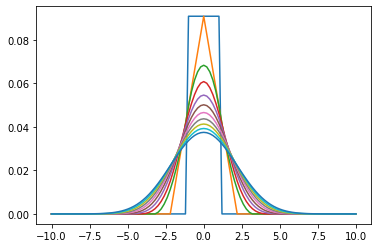

In [7]:
# repeated convolution with a bar shaped kernel results in a Gaussian shape
def r (x, w) :
    z = np.ones(x.shape[0])*np.less_equal(np.abs(x), w)
    return(z/z.sum())

plt.plot (t, r(t, 1))
h = r(t, 1)
for i in range(10) :
    h = scimage.convolve(h, r(t,1), origin = 0)
    plt.plot(t, h)

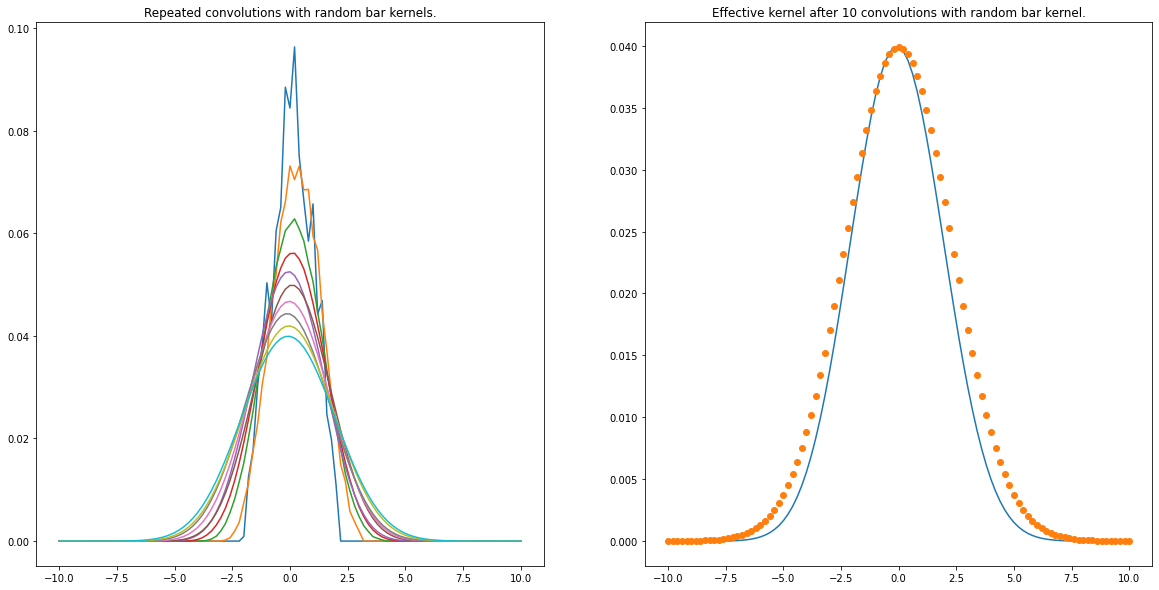

In [8]:
# repeated convolutions of random bar shaped kernels also results in a Gaussian shape
def r (x, w) :
    z = (np.random.rand(x.shape[0])) *np.less_equal(np.abs(x), w)
    return(z/z.sum())

h = r(t, 1)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

for i in range(10) :
    h = scimage.convolve(h, r(t, 1), origin = 0)
    plt.plot(t, h)
plt.title ('Repeated convolutions with random bar kernels.')
plt.subplot(1,2,2)
plt.plot(t, h)
g = gaussian(t, 2.3)
g = g*h.max()/g.max()
plt.plot(t, g, 'o')
plt.title('Effective kernel after 10 convolutions with random bar kernel.');


# 2D versions of the Gaussian filters

The 2D Gaussian kernel is given by

\begin{equation}
g(x, y) = \frac{1}{2 \pi \sigma^2} \exp -\frac{x^2 + y^2}{2 \sigma^2}
\end{equation}

Compare this with the form of the multi-dimension Gaussian pdf that we saw in Lecture 2. What are the similarities and differences? Can you relate the two forms mathematically?

Also, note that the isotropic 2D Gaussian form used here is separable into products of 1D Gaussian.

\begin{equation}
g(x, y) = \left ( \frac{1}{\sqrt{2 \pi} \sigma} \exp -\frac{x^2}{2 \sigma^2} \right ) \left ( \frac{1}{\sqrt{2 \pi} \sigma} \exp -\frac{y^2}{2 \sigma^2} \right ) =  g(x) g (y)
\end{equation}

This separable property simplifies the 2D convolution into a series of 1D convolutions. This simplification results in tremendous computation gains.

\begin{eqnarray}
g(x, y) * f(x, y) & = & \int_u \int_v f(u, v) g(x - u) g (y - v) du dv \\
& = & \int_u \left ( \int_v f(u, v) g (y - v) dv \right ) g(x - u) dv \\
& = & (f(x, y) * g(y)) * g(x) 
\end{eqnarray}

In terms of the algorithm for 2D Gaussian convolution, one needs to do 1D convolutions of each of the image rows, followed by 1D convolutions of the columns of this result. Two passes are required. When doing the row pass, all the rows can be processed simultaneously. Similarly, we can process all columns simultaneously during a column pass.

---



The 2D correlate of the first derivative of Gaussian is the **[gradient](https://en.wikipedia.org/wiki/Gradient)** function given by a vector of derivatives, each performed along an orthogonal direction.

\begin{eqnarray}
\nabla g(x, y) & = & \left [ \begin{array}{c} \frac{d}{dx} g(x, y) \\ \frac{d}{dy} g(x, y) \end{array} \right ] \\
& = & \left [ \begin{array}{c} 
- \frac{x}{2 \pi \sigma^4} \exp - \frac{x^2 + y^2}{2 \sigma^2} \\ 
- \frac{y}{2 \pi \sigma^4} \exp - \frac{x^2 + y^2}{2 \sigma^2} 
\end{array} \right ] \\
& = & \left [ \begin{array}{c} 
\left(- \frac{x}{\sqrt{2 \pi} \sigma^3} \exp - \frac{x^2}{2 \sigma^2} \right ) 
\left(- \frac{1}{\sqrt{2 \pi} \sigma} \exp - \frac{y^2}{2 \sigma^2} \right ) 
\\ 
\left(- \frac{1}{\sqrt{2 \pi} \sigma} \exp - \frac{x^2}{2 \sigma^2} \right ) 
\left(- \frac{y}{\sqrt{2 \pi} \sigma^3} \exp - \frac{y^2}{2 \sigma^2} \right )  
\end{array} \right ] \\
& = & \left [ \begin{array}{c} 
\left ( \frac{d}{dx} g(x) \right ) g(y)
\\ 
g(x) \left ( \frac{d}{dy} g(y) \right )
\end{array} \right ] 
\end{eqnarray}

In terms of the algorithm for a 2D gradient of Gaussian convolution, one needs to do 1D convolutions of each of the image's rows by the first derivative of Gaussian. 1D convolutions of the columns by Gaussian follow this operation. In the end, this will result in a derivative in one direction. These two passes need to be repeated on the original image, but with Gaussian along the rows and the first derivative of Gaussian along the columns. Thus, four passes are required. However, we can do the two sets of two passes simultaneously. As in the Gaussian convolution case, we can simultaneously process all the rows when doing the row pass. Similarly, we can process all columns simultaneously during a column pass.

---


The 2D equivalent of the second derivative of a Gaussian is the **Laplacian of a Gaussian** (LoG)
    
\begin{eqnarray}
        \nabla^2 h(x, y) = \frac{\partial^2}{\partial x^2} h(x, y) + 
        \frac{\partial^2}{\partial y^2} h(x, y)
\end{eqnarray}

Neuroscientists have found this kernel or filter shape in the retina of the eyes. It was one of the earliest edge detector proposed by [Marr and Hildreth, 1980](https://royalsocietypublishing.org/doi/abs/10.1098/rspb.1980.0020). Some refer to this filter as the Mexican hat filter. (Plot the 3D shape of the filter and see why.)

Because of the convolution operation's linear property, we can separate the convolution with the LoG into two 1D convolutions like the other two cases.


Text(0.5, 1.0, 'DoG convolved')

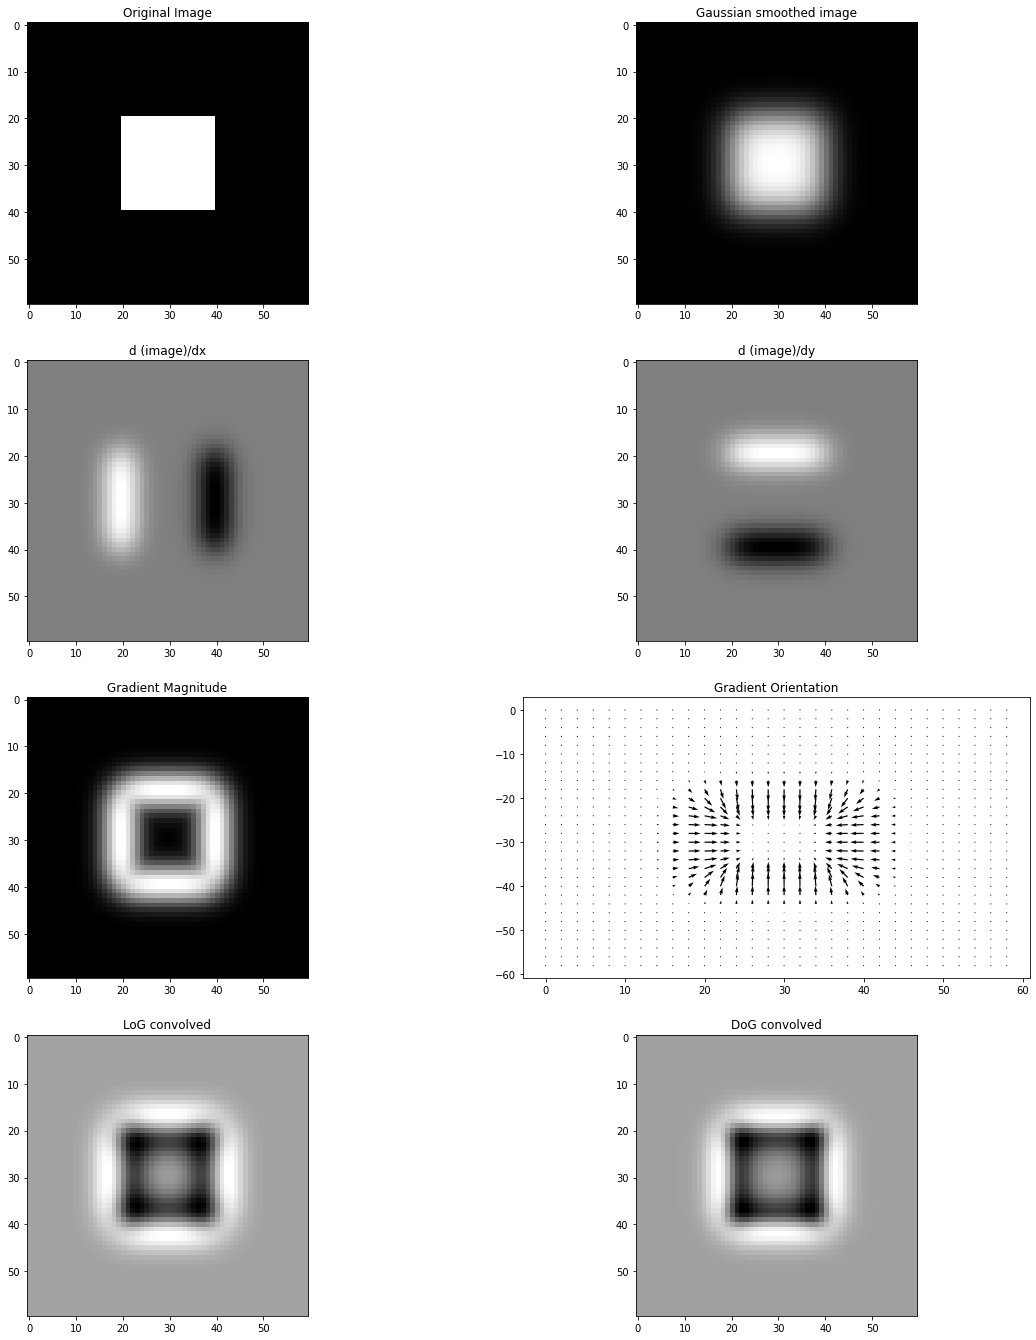

In [18]:
def gaussian (x, sigma):
    g = np.exp(-(x**2/(2*sigma*sigma)))*(1/(np.sqrt(2*np.pi)*sigma))
    return (g/g.sum())
#------------------------------------------------------------------
def first_derivative_of_gaussian (x, sigma):
    dg = np.exp(-(x**2/(2*sigma*sigma)))*(-x/(np.sqrt(2*np.pi)*sigma**3))
    return (dg)
#------------------------------------------------------------------
def second_derivative_of_gaussian (x, sigma):
    return (np.exp(-(x**2/(2*sigma*sigma)))*(-(1 - x*x/(sigma*sigma))/(np.sqrt(2*np.pi)*sigma**3)))

#------------------------------------------------------------------
def image_convolve_gaussian (image, sigma) :
    N = np.round(3*(sigma+1))
    t = np.arange(-N, N)  # Note the width of the kernel, need to be this large to capture most of the shape
    g = gaussian(t, sigma) # 1D gaussian kernel
    # Process rows
    output = image.copy()
    for i in range (image.shape[0]):
        output[i,:] = scimage.convolve(output[i, :], g)
    # Process columns
    for j in range (image.shape[1]):
        output[:, j] = scimage.convolve(output[:, j], g)
    return (output)
#------------------------------------------------------------------
def image_convolve_gradient_gaussian (image, sigma) :
    N = np.round(3*(sigma+1))
    t = np.arange(-N, N)  # Note the width of the kernel, need to be this large to capture most of the shape
    g = gaussian(t, sigma) # 1D gaussian kernel
    dg = first_derivative_of_gaussian(t, sigma) # 1D first derivative gaussian kernel
    #print("Size of 1D kernel:", g.shape, dg.shape)
    #plt.subplot(5,2,1)
    #plt.plot(t, g, 'o-')
    #plt.title('Gaussian kernel')
    #plt.subplot(5,2,2)
    #plt.plot(t, dg, 'x-')
    #plt.title('first derivative of Gaussian kernel')

    # Process rows
    gradX = image.copy()
    for i in range (image.shape[0]):
        gradX[i,:] = scimage.convolve(gradX[i, :], dg)
    # Process columns
    for j in range (image.shape[1]):
        gradX[:, j] = scimage.convolve(gradX[:, j], g)

    gradY = image.copy()
    for i in range (image.shape[0]):
        gradY[i,:] = scimage.convolve(gradY[i, :], g)
    # Process columns
    for j in range (image.shape[1]):
        gradY[:, j] = scimage.convolve(gradY[:, j], dg)

    return (gradX, gradY)

#------------------------------------------------------------------
def image_convolve_LoG (image, sigma) :
    N = np.round(4*(sigma+1)) # Note larger width 
    t = np.arange(-N, N)  # Note the width of the kernel, need to be this large to capture most of the shape
    g = gaussian(t, sigma) # 1D gaussian kernel
    ddg = second_derivative_of_gaussian (t, sigma) # 1D first derivative gaussian kernel
    #print("Size of 1D kernel:", g.shape, ddg.shape)
    #plt.subplot(5,2,1)
    #plt.plot(t, g, 'o-')
    #plt.title('Gaussian kernel')
    #plt.subplot(5,2,2)
    #plt.plot(t, ddg, 'x-')
    #plt.title('second derivative of Gaussian kernel')

    # Process rows
    dXX = image.copy()
    for i in range (image.shape[0]):
        dXX[i,:] = scimage.convolve(dXX[i, :], ddg)
    # Process columns
    for j in range (image.shape[1]):
        dXX[:, j] = scimage.convolve(dXX[:, j], g)

    dYY = image.copy()
    for i in range (image.shape[0]):
        dYY[i,:] = scimage.convolve(dYY[i, :], g)
    # Process columns
    for j in range (image.shape[1]):
        dYY[:, j] = scimage.convolve(dYY[:, j], ddg)

    return (dXX+dYY)

#------------------------------------------------------------------
img = np.zeros([60, 60]) # synthetic image of a white square 
img[20:40,20:40] = np.ones([20, 20])

smoothed_image_1 = image_convolve_gaussian (img, 2.0)
smoothed_image_2 = image_convolve_gaussian (img, 3.5)

image_dx, image_dy = image_convolve_gradient_gaussian(img, 3)
image_log = image_convolve_LoG (img, 3)

plt.figure(figsize=(20,30))
plt.subplot(5,2,3)
plt.imshow(img, cmap='gray')
plt.title ('Original Image')
plt.subplot(5,2,4)
plt.imshow(smoothed_image_2, cmap='gray')
plt.title ('Gaussian smoothed image')

# Show image gradient
plt.subplot(5,2, 5)
plt.imshow(image_dx, cmap='gray')
plt.title('d (image)/dx')
plt.subplot(5,2, 6)
plt.imshow(image_dy, cmap='gray')
plt.title('d (image)/dy');

# Show image gradient and orientation
plt.subplot(5,2, 7)
grad_mag = np.sqrt(image_dx*image_dx + image_dy*image_dy)+0.0001
plt.imshow(grad_mag, cmap='gray')
plt.title('Gradient Magnitude')
plt.subplot(5,2, 8)
# Show the gradient directions every 10th pixel otherwise it is too crowded.
x = np.arange(0, img.shape[1], 2)
y = np.arange(0, img.shape[0], 2)
X, Y = np.meshgrid(x, y)
cos_t = image_dx/grad_mag
sin_t = image_dy/grad_mag
plt.quiver(X, -Y, image_dx[::2,::2], -image_dy[::2,::2], scale=1 / 0.2)
plt.title('Gradient Orientation');

# Show Laplacian of Gaussian
plt.subplot(5,2, 9)
plt.imshow(image_log, cmap='gray')
plt.title('LoG convolved')
plt.subplot(5,2, 10)
plt.imshow(smoothed_image_2 - smoothed_image_1, cmap='gray')
plt.title('DoG convolved')


In [19]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/Colab\ Notebooks/data/house_facade.png


Mounted at /content/drive
'/content/drive/MyDrive/Colab Notebooks/data/house_facade.png'


Input image size: (575, 835)


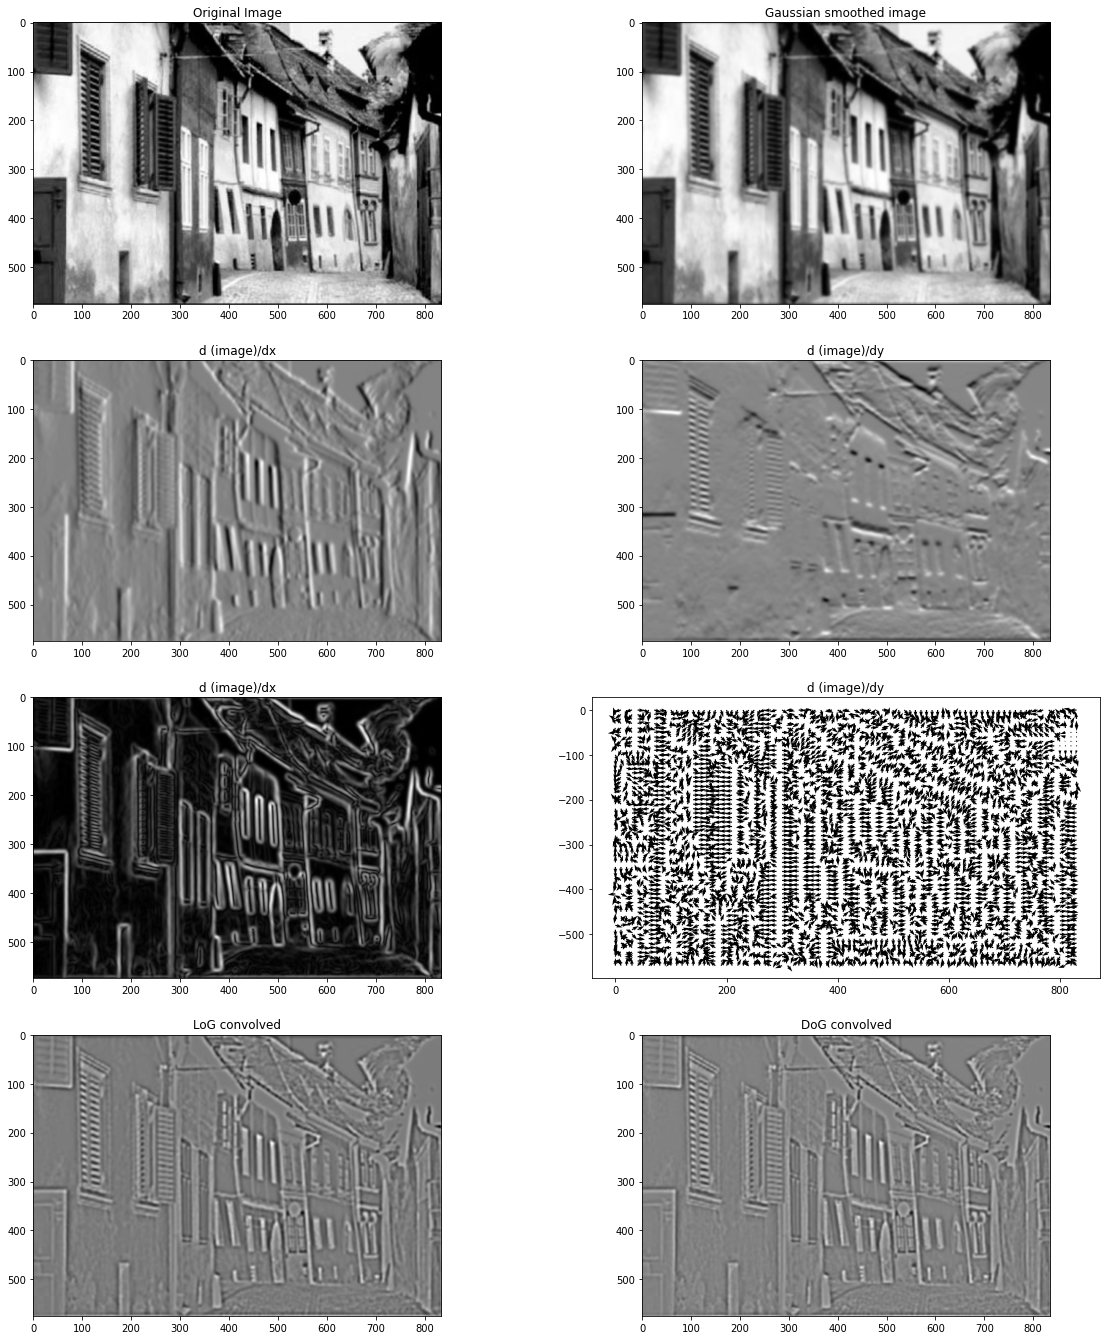

In [21]:
#------------------------------------------------------------------
import cv2

# Load an color image in grayscale
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/house_facade.png')

# Change color spaces. Can experiment with other spaces.
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Input image size:", img.shape)
plt.figure(figsize=(20,30))
img = img.astype(np.float)  # need to change type from uint8 to float

smoothed_image_1 = image_convolve_gaussian (img, 2.0)
smoothed_image_2 = image_convolve_gaussian (img, 3.5)

image_dx, image_dy = image_convolve_gradient_gaussian(img, 3)
image_log = image_convolve_LoG (img, 3)


plt.subplot(5,2,3)
plt.imshow(img, cmap='gray')
plt.title ('Original Image')
plt.subplot(5,2,4)
plt.imshow(smoothed_image_1, cmap='gray')
plt.title ('Gaussian smoothed image')

# Show image gradient
plt.subplot(5,2, 5)
plt.imshow(image_dx, cmap='gray')
plt.title('d (image)/dx')
plt.subplot(5,2, 6)
plt.imshow(image_dy, cmap='gray')
plt.title('d (image)/dy');

# Show image gradient and orientation
plt.subplot(5,2, 7)
grad_mag = np.sqrt(image_dx*image_dx + image_dy*image_dy)+0.0001
plt.imshow(grad_mag, cmap='gray')
plt.title('d (image)/dx')
plt.subplot(5,2, 8)
# Show the gradient directions every 10th pixel otherwise it is too crowded.
x = np.arange(0, img.shape[1], 10)
y = np.arange(0, img.shape[0], 10)
X, Y = np.meshgrid(x, y)
cos_t = image_dx/grad_mag
sin_t = image_dy/grad_mag
#plt.imshow(cos_t[::10,::10])
plt.quiver(X, -Y, cos_t[::10,::10], -sin_t[::10,::10], scale=1 / 0.015)
plt.title('d (image)/dy');

# Show Laplacian of Gaussian
plt.subplot(5,2, 9)
plt.imshow(image_log, cmap='gray')
plt.title('LoG convolved')
plt.subplot(5,2, 10)
plt.imshow(smoothed_image_2 - smoothed_image_1, cmap='gray')
plt.title('DoG convolved');